In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import pandas as pd

In [5]:
# 加载数据
data = pd.read_csv('covtype.data', header=None)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
# 标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [6]:
# 应用Lasso回归进行特征选择，设置C较小以促进特征的稀疏
lasso_reg = LogisticRegression(penalty='l1', solver='liblinear', C=0.01, max_iter=10000)
lasso_reg.fit(X_train, y_train)
# 获取特征系数
coefficients = lasso_reg.coef_[0]
# 筛选出非零系数的特征，即重要特征
selected_features = X.columns[np.abs(coefficients) > 0]
print("Selected Features Based on Lasso Coefficients:", selected_features)

Selected Features Based on Lasso Coefficients: Index([ 0,  1,  2,  3,  4,  5,  7,  8,  9, 10, 11, 13, 15, 16, 17, 20, 21, 22,
       23, 25, 26, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53],
      dtype='int64')


In [7]:
# 使用选中的特征重新训练逻辑回归模型
X_train_selected = X_train[:, np.isin(X.columns, selected_features)]
X_test_selected = X_test[:, np.isin(X.columns, selected_features)]

In [8]:
# 逻辑回归模型
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train_selected, y_train)

D:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [9]:
# 预测并评估
predictions = logistic_regression.predict(X_test_selected)
print("Test Accuracy: {:.2f}%".format(accuracy_score(y_test, predictions)*100))

Test Accuracy: 72.18%


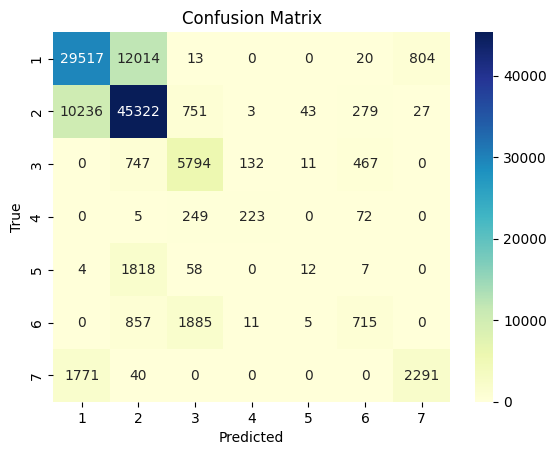

In [14]:
# 输出混淆矩阵
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=np.arange(1, 8), yticklabels=np.arange(1, 8))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [16]:
# 输出分类报告
class_names = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']
print("\nClassification Report:")
report = classification_report(y_test, predictions, target_names=class_names)
print(report)


Classification Report:
                   precision    recall  f1-score   support

       Spruce/Fir       0.71      0.70      0.70     42368
   Lodgepole Pine       0.75      0.80      0.77     56661
   Ponderosa Pine       0.66      0.81      0.73      7151
Cottonwood/Willow       0.60      0.41      0.49       549
            Aspen       0.17      0.01      0.01      1899
      Douglas-fir       0.46      0.21      0.28      3473
        Krummholz       0.73      0.56      0.63      4102

         accuracy                           0.72    116203
        macro avg       0.58      0.50      0.52    116203
     weighted avg       0.71      0.72      0.71    116203

